In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import time

### Problem 1:
Find the total sales for each category of items.

In [1]:
%%file codes/category_cost.py 
# this magic command allows saving output of python to folder
from mrjob.job import MRJob


class MRJobCategoryCost(MRJob):
    
    def mapper(self,_,line):
        data = line.strip().split('\t')  # delete whitespace and tokenize
        if len(data) == 6:
            date, time, store, category, cost, payment = data  # unpacking the data
            yield (category, float(cost))  # key pair to send to reducer
        
    def reducer(self, category,cost):
        yield category, sum(cost)  # reducer return

        
if __name__ == '__main__':  
    MRJobCategoryCost.run()  # where MRJobCategoryCost is your job class

Overwriting codes/category_cost.py


In [3]:
%time
! python codes/category_cost.py < data/test_purchases.txt > outputs/p1category_cost.txt

Wall time: 0 ns


Using configs in C:\Users\Amin\.mrjob.conf
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory C:\Users\Amin\AppData\Local\Temp\category_cost.Amin.20190304.035253.643163
reading from STDIN
job output is in C:\Users\Amin\AppData\Local\Temp\category_cost.Amin.20190304.035253.643163\output
Streaming final output from C:\Users\Amin\AppData\Local\Temp\category_cost.Amin.20190304.035253.643163\output...
Removing temp directory C:\Users\Amin\AppData\Local\Temp\category_cost.Amin.20190304.035253.643163...


Text(0,0.5,'category')

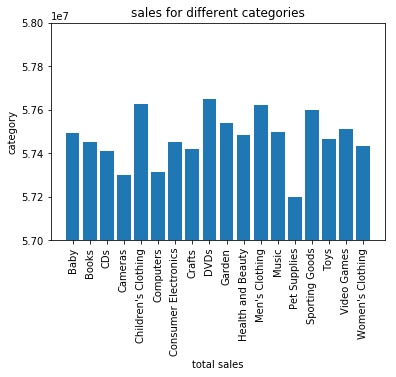

In [15]:
df_cat = pd.read_csv('outputs/category_cost.txt', sep = '\t', header=-1)
df_cat.columns = ['category','total_sale']
plt.bar(df_cat['category'],df_cat['total_sale'])
plt.xticks(rotation=90)
plt.ylim([5.7e7,5.8e7])
plt.title('sales for different categories')
plt.xlabel('total sales')
plt.ylabel('category')

### Problem 2:
Find the total sales for each store.

In [25]:
%%file codes/store_sale.py 
# this magic command allows saving output of python to folder
from mrjob.job import MRJob


class MRJobStoreSales(MRJob):
    
    def mapper(self,_,line):
        data = line.strip().split('\t')  # delete whitespace and tokenize
        if len(data) == 6:
            date, time, store, category, cost, payment = data  # unpacking the data
            if store in ['Reno','Toledo','Chandler']:  # we are only interested in these cities
                yield (store, float(cost))  # key pair to send to reducer
        
    def reducer(self, category,cost):
        yield category, max(cost)  # reducer return

        
if __name__ == '__main__':  
    MRJobStoreSales.run()  # where MRJobCategoryCost is your job class

Overwriting codes/store_sale.py


In [26]:
tic = time.time()
! python codes/store_sale.py < data/purchases.txt > outputs/p2storesales.txt
toc = time.time()

print('Running this query took {} seconds.'.format(toc - tic))

Running this query took 71.59286904335022 seconds.


No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory C:\Users\Amin\AppData\Local\Temp\store_sale.Amin.20190226.071959.506477
reading from STDIN
job output is in C:\Users\Amin\AppData\Local\Temp\store_sale.Amin.20190226.071959.506477\output
Streaming final output from C:\Users\Amin\AppData\Local\Temp\store_sale.Amin.20190226.071959.506477\output...
Removing temp directory C:\Users\Amin\AppData\Local\Temp\store_sale.Amin.20190226.071959.506477...


#### Problem 3
Total sales and total number of transactions.

In [32]:
%%file codes/total_sale.py 
# this magic command allows saving output of python to folder
from mrjob.job import MRJob


class MRJobTotalSale(MRJob):
    
    def mapper(self,_,line):
        data = line.strip().split('\t')  # delete whitespace and tokenize
        if len(data) == 6:
            cost = data[4]  # unpacking the data
            yield (None, float(cost))  # no key availale
        
    def reducer(self, category,cost):
        yield 'Total = ', round(sum(cost),2)  # reducer return

        
if __name__ == '__main__':  
    MRJobTotalSale.run()  # where MRJobCategoryCost is your job class

Overwriting codes/total_sale.py


In [35]:
tic = time.time()
! python codes/total_sale.py < data/purchases.txt > outputs/p3totalsale.txt
toc = time.time()

print('Running this query took {} seconds.'.format(toc - tic))

Running this query took 335.0408570766449 seconds.


No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory C:\Users\Amin\AppData\Local\Temp\total_sale.Amin.20190227.041403.313817
reading from STDIN
job output is in C:\Users\Amin\AppData\Local\Temp\total_sale.Amin.20190227.041403.313817\output
Streaming final output from C:\Users\Amin\AppData\Local\Temp\total_sale.Amin.20190227.041403.313817\output...
Removing temp directory C:\Users\Amin\AppData\Local\Temp\total_sale.Amin.20190227.041403.313817...


In [39]:
%%file codes/num_transaction.py 
# this magic command allows saving output of python to folder
from mrjob.job import MRJob


class MRJobTransNum(MRJob):
    
    def mapper(self,_,line):
        data = line.strip().split('\t')  # delete whitespace and tokenize
        if len(data) == 6:
            yield (None, 1)  # no key availale
        
    def reducer(self, category,cost):
        yield 'Total Number = ', sum(cost) # reducer return

        
if __name__ == '__main__':  
    MRJobTransNum.run()  # where MRJobCategoryCost is your job class

Overwriting codes/num_transaction.py


In [41]:
tic = time.time()
! python codes/num_transaction.py < data/purchases.txt
toc = time.time()

print('Running this query took {} seconds.'.format(toc - tic))

"Total Number = "	4138476
Running this query took 318.72618341445923 seconds.


No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory C:\Users\Amin\AppData\Local\Temp\num_transaction.Amin.20190227.042552.661655
reading from STDIN
job output is in C:\Users\Amin\AppData\Local\Temp\num_transaction.Amin.20190227.042552.661655\output
Streaming final output from C:\Users\Amin\AppData\Local\Temp\num_transaction.Amin.20190227.042552.661655\output...
Removing temp directory C:\Users\Amin\AppData\Local\Temp\num_transaction.Amin.20190227.042552.661655...


#### Problem 4
Find the mean of sale for each day of the week use map reduce.

In [74]:
%%file codes/weekly_sales.py 
# this magic command allows saving output of python to folder
from mrjob.job import MRJob
from datetime import datetime

class MRJobWeeklySales(MRJob):
    
    def mapper(self,_,line):
        data = line.strip().split('\t')  # delete whitespace and tokenize
        if len(data) == 6:
            date = data[0]
            cost = data[4]
            day = datetime.strptime(date, '%Y-%m-%d').weekday()
            weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
            
            yield (weekmap[day], float(cost))  # no key availale
                
    def reducer(self, day, cost):
        n = total = 0
        for c in cost:
            n += 1
            total += c
        yield day, total / n # reducer return

        
if __name__ == '__main__':  
    MRJobWeeklySales.run()  # where MRJobCategoryCost is your job class

Overwriting codes/weekly_sales.py


In [73]:
tic = time.time()
! python codes/weekly_sales.py < data/sample.txt
toc = time.time()

print('Running this query took {} seconds.'.format(toc - tic))
# I will perform this on cloud

"Mon"	245.96899999999997
Running this query took 2.6555721759796143 seconds.


No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory C:\Users\Amin\AppData\Local\Temp\weekly_sales.Amin.20190302.061047.025348
reading from STDIN
job output is in C:\Users\Amin\AppData\Local\Temp\weekly_sales.Amin.20190302.061047.025348\output
Streaming final output from C:\Users\Amin\AppData\Local\Temp\weekly_sales.Amin.20190302.061047.025348\output...
Removing temp directory C:\Users\Amin\AppData\Local\Temp\weekly_sales.Amin.20190302.061047.025348...


#### Problem 5
Add combiners to your MRJob and get the sale for each day of the week.

In [78]:
%%file codes/weekly_total.py 
# this magic command allows saving output of python to folder
from mrjob.job import MRJob
from datetime import datetime

class MRJobWeeklyTotals(MRJob):
    
    def mapper(self,_,line):
        data = line.strip().split('\t')  # delete whitespace and tokenize
        if len(data) == 6:
            date = data[0]
            cost = data[4]
            day = datetime.strptime(date, '%Y-%m-%d').weekday()
            weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
            yield (weekmap[day], float(cost))  # no key availale
    
    def combiner(self, day, cost): # performing sum aggregation locally
        yield day, sum(cost)
        
    def reducer(self, day, cost):
        yield day, sum(cost) # reducer return

        
if __name__ == '__main__':  
    MRJobWeeklyTotals.run()  # where MRJobCategoryCost is your job class

Overwriting codes/weekly_total.py


In [80]:
tic = time.time()
! python codes/weekly_total.py < data/purchases.txt
toc = time.time()

print('Running this query took {} seconds.'.format(toc - tic))
# I will perform this on cloud

"Fri"	147414929.5000001
"Mon"	150364112.0700001
"Sat"	147410177.57000005
"Sun"	150296795.46999985
"Thu"	147353780.57000002
"Tue"	147246658.13999978
"Wed"	144371499.9399998
Running this query took 461.49702310562134 seconds.


No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory C:\Users\Amin\AppData\Local\Temp\weekly_total.Amin.20190302.061854.550743
reading from STDIN
job output is in C:\Users\Amin\AppData\Local\Temp\weekly_total.Amin.20190302.061854.550743\output
Streaming final output from C:\Users\Amin\AppData\Local\Temp\weekly_total.Amin.20190302.061854.550743\output...
Removing temp directory C:\Users\Amin\AppData\Local\Temp\weekly_total.Amin.20190302.061854.550743...
